<a href="https://colab.research.google.com/github/Mohd-Saif-IITB/Python-for-Oil-Gas/blob/main/Exploration_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing Libraries:** bcoz some python library is not inbuilt in google colab, we need to install it

For more visit: https://github.com/yohanesnuwara

In [35]:
#from pypi.org we can get many libraries and can install it here

!pip install lasio # for well log data
!pip install mplstereonet # for natural fracture data

# after this we will import this as well as others which is required

import lasio # to read .las file from petrel
import numpy as np # for numerical calculations
import pandas as pd # to read .csv file
import matplotlib.pyplot as plt # to plot differnt plots
import plotly.express as px # to plot well bore trajectory in 3D

#Get additional function for natural fracture analysis and also import it
!wget https://raw.githubusercontent.com/Mohd-Saif-IITB/Python-for-Oil-Gas/main/Fracture.py #this will be uploaded in ur google colab
import Fracture # for natural fracture analysis # this is personally made library

--2022-03-19 17:37:59--  https://raw.githubusercontent.com/Mohd-Saif-IITB/Python-for-Oil-Gas/main/Fracture.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1840 (1.8K) [text/plain]
Saving to: ‘Fracture.py.2’

Fracture.py.2       100%[===================>]   1.80K  --.-KB/s    in 0s      

2022-03-19 17:37:59 (32.0 MB/s) - ‘Fracture.py.2’ saved [1840/1840]



**WELL LOGGING**

In [36]:
# Now we will give DATA LINKS for the well path data

Well_path="https://raw.githubusercontent.com/Mohd-Saif-IITB/Python-for-Oil-Gas/main/Well%20log%20data.csv"


In [37]:
# reading LAS well log data

well=lasio.read(Well_path)

In [38]:
# display mnemonics(means all info) of well data

well.curves # here we can see all the units also

[CurveItem(mnemonic="DEPT", unit="m", value="", descr="DEPTH", original_mnemonic="DEPT", data.shape=(21386,)),
 CurveItem(mnemonic="LITHOLOGY_GEOLINK", unit="_", value="", descr="Lithology_geolink", original_mnemonic="LITHOLOGY_GEOLINK", data.shape=(21386,)),
 CurveItem(mnemonic="CALI", unit="in", value="", descr="CALI", original_mnemonic="CALI", data.shape=(21386,)),
 CurveItem(mnemonic="DRHO", unit="g/cm3", value="", descr="DRHO", original_mnemonic="DRHO", data.shape=(21386,)),
 CurveItem(mnemonic="NPHI", unit="m3/m3", value="", descr="NPHI", original_mnemonic="NPHI", data.shape=(21386,)),
 CurveItem(mnemonic="RHOB", unit="g/cm3", value="", descr="RHOB", original_mnemonic="RHOB", data.shape=(21386,)),
 CurveItem(mnemonic="GR", unit="gAPI", value="", descr="GR", original_mnemonic="GR", data.shape=(21386,)),
 CurveItem(mnemonic="DTC", unit="us/ft", value="", descr="DTC", original_mnemonic="DTC", data.shape=(21386,)),
 CurveItem(mnemonic="DTE", unit="us/ft", value="", descr="DTE", origi

In [39]:
# the data is in a multidimensional array

well.data # here data is in numpy format array but we want to see in excel,csv or spreadsheet format so that we can convert data into dataframe

array([[4.93493134e+02,            nan, 1.94060001e+01, ...,
        1.54602885e+00,            nan, 1.54602885e+00],
       [4.93645538e+02,            nan, 1.94060001e+01, ...,
        1.57003009e+00,            nan, 1.57003009e+00],
       [4.93797943e+02,            nan, 1.94060001e+01, ...,
        1.59499407e+00,            nan, 1.59499407e+00],
       ...,
       [3.75226196e+03,            nan, 7.55499983e+00, ...,
        3.15799999e+00,            nan, 3.15799999e+00],
       [3.75241431e+03,            nan, 7.55499983e+00, ...,
        3.15799999e+00,            nan, 3.15799999e+00],
       [3.75256665e+03,            nan, 7.55499983e+00, ...,
        3.15799999e+00,            nan, 3.15799999e+00]])

In [40]:
# Convert well data to dataframe

well.df().reset_index()

,DEPT,LITHOLOGY_GEOLINK,CALI,DRHO,NPHI,RHOB,GR,DTC,DTE,RDEP,SP,RSHA,RXO,RMED
0,493.493134,NaN,19.406000,-0.708,NaN,1.789,64.497482,167.582153,50815100.0,1.574993,0.694700,1.546029,NaN,1.546029
1,493.645538,NaN,19.406000,-0.722,NaN,1.754,62.406261,167.425064,50761636.0,1.569011,0.445339,1.570030,NaN,1.570030
2,493.797943,NaN,19.406000,-0.620,NaN,1.778,62.629055,167.808395,50886056.0,1.578010,0.727901,1.594994,NaN,1.594994
3,493.950348,NaN,19.452999,-0.648,NaN,1.642,65.998596,169.244873,51314492.0,1.586024,1.474898,1.589930,NaN,1.589930
4,494.102722,NaN,19.452999,-0.685,NaN,1.563,64.997223,170.635086,51763464.0,1.603011,-0.023000,1.540016,NaN,1.540016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21381,3751.957031,NaN,7.555000,0.085,0.13574,2.586,NaN,NaN,NaN,3.363003,70.302795,3.159997,NaN,3.159997
21382,3752.109375,NaN,7.555000,0.085,0.13574,2.586,NaN,NaN,NaN,3.364997,70.799194,3.158000,NaN,3.158000
21383,3752.261963,NaN,7.555000,0.085,0.13574,2.586,NaN,NaN,NaN,3.363006,71.544258,3.158000,NaN,3.158000
21384,3752.414307,NaN,7.555000,0.085,0.13574,2.586,NaN,NaN,NaN,3.364537,70.463211,3.158000,NaN,3.158000


Visualizing well logs using for looping and subplots:NPHI,RHOB,GR,RDEP,DTC

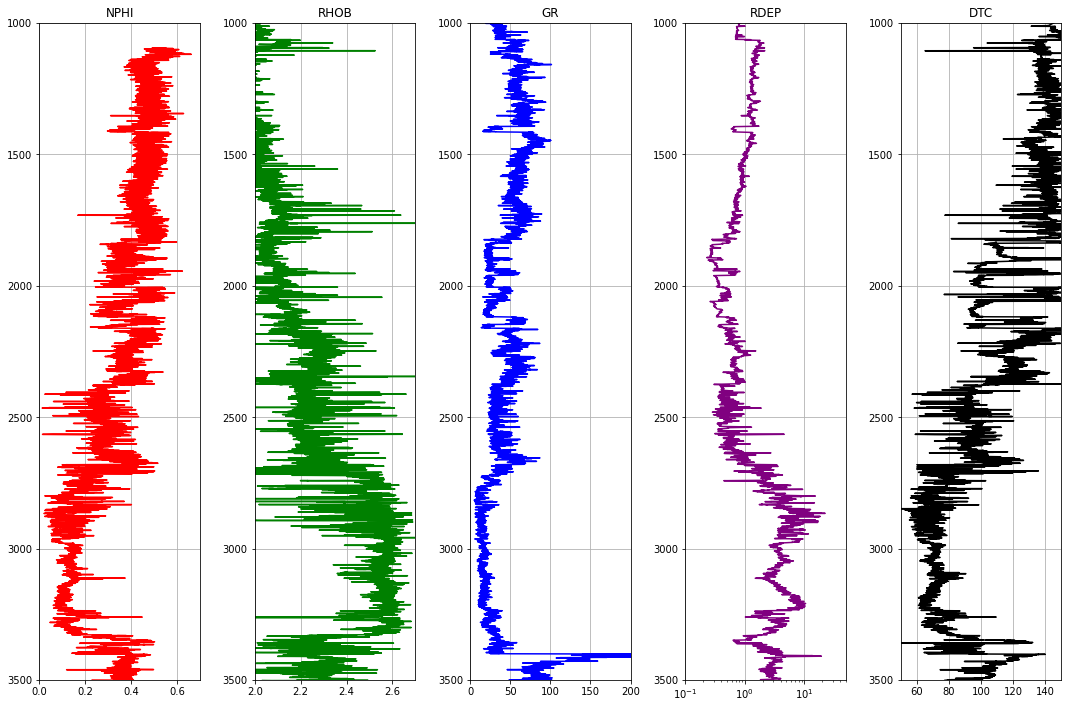

In [41]:
log=["NPHI","RHOB","GR","RDEP","DTC"]
color=["red","green","blue","purple","black"] # we can also use short forms of colors
xmin=[0,2,0,0.1,50] # putting minimum x limit in out data to see it more clearly
xmax=[0.7,2.7,200,50,150] # similarly putting maximum x limit

plt.figure(figsize=(15,10))# choosing size of plot

for i in range(len(log)): # u can also write range(5): bcoz we have 5 logs-NPHI,RHOB,GR,RDEP,DTC
  plt.subplot(1,5,i+1) # means in 1 row and 5 column plot in 1st then 2nd and so on
  if log[i]=="RDEP": # RDEP has very big range of data so we need to plot it in semi-log
   plt.semilogx(well[log[i]],well["DEPT"],color=color[i]) #semilog plot
  else:
      plt.plot(well[log[i]],well["DEPT"],color=color[i]) #normal plot

  plt.title(log[i]) # gives title on top
  plt.grid()
  plt.tight_layout(1.3)
  plt.ylim(3500,1000) # we must reverse the DEPT data so that we can see changes from top to bottom not vice-versa
  plt.xlim(xmin[i],xmax[i])
  
plt.show()

**WELL BORE TRAJECTORY**

In [42]:
# Giving path of our data and Loading wellbore trajectory data

Trajectory_path="https://raw.githubusercontent.com/Mohd-Saif-IITB/Python-for-Oil-Gas/main/Well%20bore%20trajectory%20data.csv"
traj_df=pd.read_csv(Trajectory_path) # using pandas
traj_df

,azi,md,tvd,incl,dispNs,dispEw,TVD_calc,surfNs,surfEw
0,0.00,0.0000,0.0000,0.00,-3.1700,3.5300,0.000000,6.478560e+06,435053.550000
1,0.00,145.9000,145.9000,0.00,-3.1700,3.5300,145.900000,6.478560e+06,435053.550000
2,253.69,153.4000,153.4000,0.15,-3.1728,3.5206,153.399991,6.478560e+06,435053.540578
3,146.02,234.2000,234.1996,0.28,-3.3662,3.5294,234.199630,6.478560e+06,435053.549412
4,136.21,274.6000,274.5978,0.78,-3.6465,3.7749,274.597780,6.478560e+06,435053.794881
...,...,...,...,...,...,...,...,...,...
109,107.51,4524.2000,3185.9439,77.65,201.7164,1449.4273,3185.943916,6.478765e+06,436499.447329
110,107.84,4564.9000,3193.8139,80.05,189.5929,1487.4710,3193.813855,6.478753e+06,436537.491089
111,108.48,4605.4030,3200.1182,82.04,177.1232,1525.4852,3200.118246,6.478741e+06,436575.505217
112,108.37,4645.7049,3205.6993,82.04,164.5080,1563.3527,3205.699325,6.478728e+06,436613.372759


In [43]:
# Plotting trajectory with inclination as point colors
# surfNs as Y-axis; surfEw as X-axis; tvd as Z-axis

x=traj_df["surfEw"].values
y=traj_df["surfNs"].values
z=traj_df["tvd"].values

fig= px.scatter_3d(traj_df,x,y,z,color="incl") # using plotly.express for scatter plot in 3D # color based on inclination(incl) # also we can color based on azimuth(azi)
fig.update_scenes(zaxis_autorange="reversed") # we must reverse the tvd so that we can visualize from surface into the ground
fig.show() # we can see how the well bore looks like inside ground # this is not a vertical well

**NATURAL FRACTURE ANALYSIS**

In [44]:
# we specify the path of our fracture data and load the file using pandas

Fracture_path="https://raw.githubusercontent.com/Mohd-Saif-IITB/Python-for-Oil-Gas/main/Fracture%20data.csv"
frac_df=pd.read_csv(Fracture_path)
frac_df # we can see dip strike and other info

,depth,strike,dip,dip_direction,aperture
0,5200.824,228.25,76.41,318.25,4.31
1,5200.965,207.80,86.11,297.80,5.87
2,5205.068,233.97,84.07,323.97,7.22
3,5208.820,206.68,82.67,296.68,5.52
4,5221.970,214.65,77.20,304.65,5.44
5,5232.421,211.99,79.37,301.99,9.95
6,5248.538,214.61,79.88,304.61,12.24
7,5252.678,226.41,84.78,316.41,10.21
8,5269.203,245.50,80.63,335.50,8.22
9,5280.625,238.08,81.70,328.08,2.67


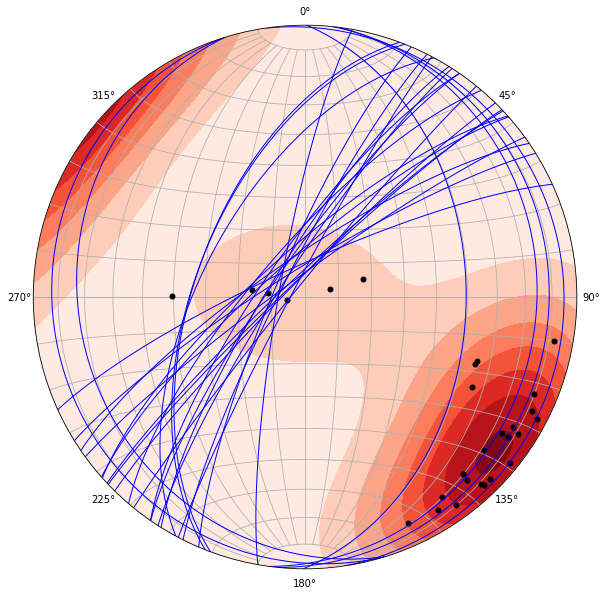

In [45]:
# Defining Strike and Dip by Stereonet

strike=frac_df["strike"].values
dip=frac_df["dip"].values

# Visualize Stereonet(Schmidt projection)from"fracture"library which we have imported in beginning

Fracture.stereonet(strike,dip) #blue lines=strikes; black dots=dips;red=heat map means most dominant orientation of dips in our fracture
# we see clusters of blue line from 0 to 45 degree so that is our fracture orientation means strike
# we see clusters of black dots from 90 to 135 degree so that is our fracture dip which is 80 to 90 degree

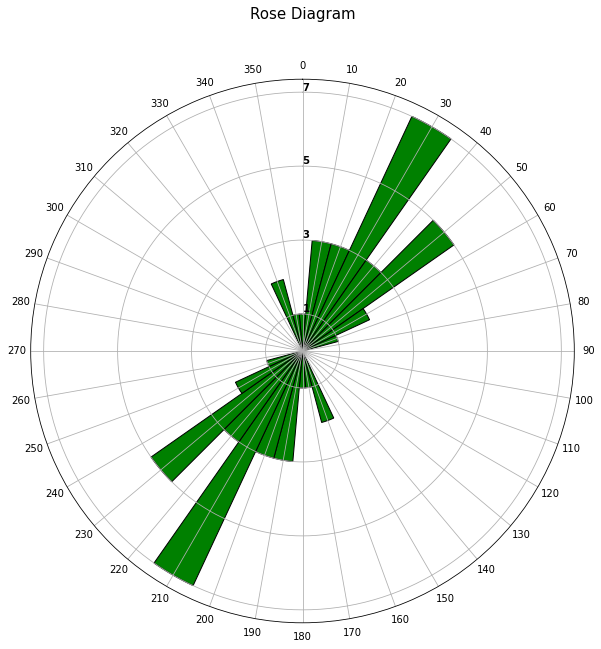

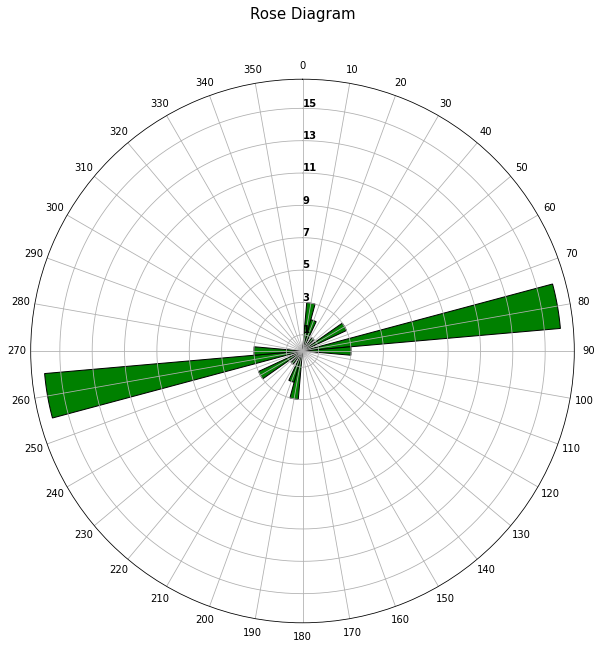

In [46]:
# Visualize Rose Diagram from "fracture" library

Fracture.rose(strike) #fracture strike is 25 to 35 degree clearly seen

Fracture.rose(dip) #fracture dip is 75 to 85 degree clearly seen
